Import necessary modules

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


tf.keras.backend.set_floatx('float64')


Load and preprocess data

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train_original=y_train.copy()
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
yt_lab=y_test
y_test = tf.keras.utils.to_categorical(y_test, 10)


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Create simple classification model - 2 equivalent definitions

In [ ]:
D1=Dense(128,activation="relu") # layer constructor 
D2=Dense(128,activation="relu") # layer constructor 
D3=Dense(10,activation="softmax") # layer constructor 
input=Input(shape=(28, 28, 1)) 
out=D3(D2(D1(Flatten()(input))))
model=Model(input,out) #if I reuse D1-3 in another model (say model2), model parameters will be changed during training of model2


callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True) #define callback
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
input=Input(shape=(28, 28, 1)) 
x = Flatten()(input)
x=Dense(128,activation="relu")(x)
x1=Dense(128,activation="relu")(x)
x2=Dense(2)(x1)
out=Dense(10,activation="softmax")(x2)
model=Model(input,out)
model2=Model(input,x2)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) #define callback
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())





Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 258       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                30        
Total params: 117,280
Trainable params: 117,280
Non-trainable params: 0
_____________________________________________________

In [12]:
#model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2,callbacks=[callback]) # - with callback
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2) #without callback

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 1.3930 - accuracy: 0.4663 - val_loss: 0.6033 - val_accuracy: 0.8679
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5458 - accuracy: 0.8737 - val_loss: 0.4250 - val_accuracy: 0.9031
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3516 - accuracy: 0.9178 - val_loss: 0.3411 - val_accuracy: 0.9261
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2785 - accuracy: 0.9362 - val_loss: 0.3305 - val_accuracy: 0.9329
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2171 - accuracy: 0.9466 - val_loss: 0.3128 - val_accuracy: 0.9370
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1769 - accuracy: 0.9562 - val_loss: 0.2902 - val_accuracy: 0.9447
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1537 - accuracy: 0.9612 - val_loss: 0.2909 - val_accuracy: 0.9457
Epoch 

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
y=model2(x_train)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36021003816230224
Test accuracy: 0.9549


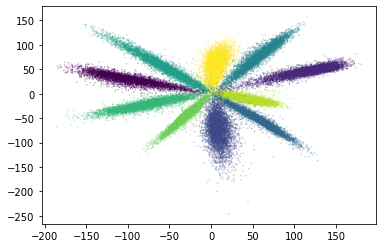

In [57]:
y
import matplotlib.pyplot as plt
plt.scatter(y[:,0], y[:,1], marker='.', s=0.1, c=y_train_original)

Pick some examples which were classified incorectly

In [ ]:
incorrects = np.nonzero(tf.keras.backend.argmax(model.predict(x_test),1) != yt_lab)

aa=incorrects[0].astype(int)[0:9]

Prediction

In [ ]:
tf.keras.backend.argmax(model.predict(x_test),1).numpy()[aa]

array([5, 9, 8, 6, 7, 7, 0, 9, 2])

ground truth

In [ ]:
yt_lab[aa]

array([9, 2, 9, 4, 2, 8, 6, 4, 8], dtype=uint8)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


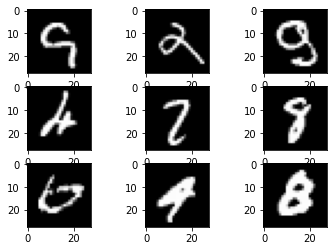

In [ ]:
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy)  = tf.keras.datasets.mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
j=0

for i in aa[0:9]:
  # define subplot
  pyplot.subplot(330 + 1 + j)
  j=j+1
  pyplot.imshow(testX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()